# Automatas Celulares:

**Eduardo Carrasco Vidal**

## Creación de un Elementary Celular Automata (Unidimensional):

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    estado_inicial_r = [random.randint(0, 1) for _ in range(tamano)]
    return estado_inicial_r

In [130]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_seteado(tamano):
    # generamos una lista de 0 por el tamaño
    estado_inicial_s = [0] * tamano
    # con esto dejamos el del medio, divide la grilla en 2 y deja el del medio en 1
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [131]:
# Convierte un número de regla de Wolfram en un diccionario que mapea vecindarios de 3 células (width=3)
# a estados de células actualizados
def regla_binaria(numero_regla):
    #Consideramos como 8 el numero de digitos
    binario = np.binary_repr(numero_regla, width=8)
    # Generamos división de valores binarios de 3 (del 0 al 7), para asignarle un digito de la regla
    return {np.binary_repr(i, width=3): int(x) for i, x in enumerate(reversed(binario))}

In [132]:
# Aplica la regla anterior a cada generación
def siguiente_generacion(celdas, regla):
    celdas_ext = np.pad(celdas, pad_width=1, mode='wrap')
    vecindarios = [celdas_ext[i:i+3] for i in range(len(celdas))]
    vecindarios_str = [''.join(str(x) for x in vec) for vec in vecindarios]
    return np.array([regla[vec_str] for vec_str in vecindarios_str])

In [133]:
def automata_celular(numero_regla, n_generaciones, tamano, estado_inicial):
    regla = regla_binaria(numero_regla)
    generaciones = [estado_inicial]
    # Itera n_generaciones - 1 veces, ya que la primera generación es el estado inicial.
    for _ in range(n_generaciones - 1):
        #  Genera la siguiente generación del autómata celular utilizando la función 
        # siguiente_generacion con la última generación en la lista generaciones y el diccionario de reglas regla.
        nueva_gen = siguiente_generacion(generaciones[-1], regla)
        ## Añade la nueva generación a la lista de generaciones.
        generaciones.append(nueva_gen)
        #Devuelve una matriz que representa todas las generaciones del autómata celular. 
        #La función np.vstack apila verticalmente las listas en la lista generaciones para formar una matriz.
    return np.vstack(generaciones)

In [134]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    print(f"  Número de Regla de Wolfram: {numero_regla}")
    print(f"  Número de Generaciones: {n_generaciones}")
    print(f"  Tamaño de la grilla: {tamano}")
    print(f"  Período del Ciclo: {periodo_ciclo}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

In [135]:
## función para calcular el patron de comportamiento
def patron_ciclo(automata):
    n_filas = len(automata) #total generaciones
    # se generan dos ciclos para i (estado inicial) y j (estado inicial + 1 "siguiente")
    for i in range(n_filas):
        for j in range(i + 1, n_filas):
            #comparamos ambos ciclos
            if np.array_equal(automata[i], automata[j]):
                # si son iguales, el período se resta al otro (j-i)
                return j - i
    # caso contrario, la función dice None            
    return 'No hay ciclo'

### Regla 30

  Número de Regla de Wolfram: 30
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


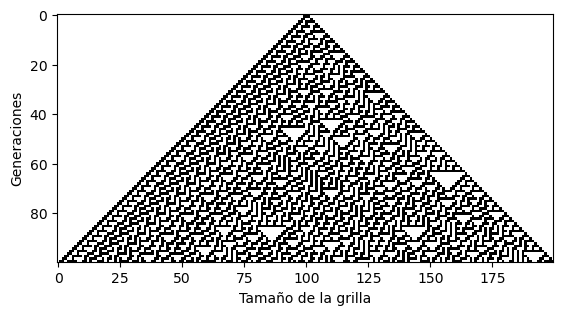

In [173]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 30
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)
periodo_ciclo = patron_ciclo(automata)

In [174]:
automata[:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [175]:
## Representación binaria de la primera regla
## se puede usar para cualquier representación binaria
np.binary_repr(numero_regla, width=8)

'00011110'

In [176]:
n_filas = len(automata)
n_filas

100

In [177]:
periodo_ciclo = patron_ciclo(automata)
periodo_ciclo

'No hay ciclo'

## Regla 20:

  Número de Regla de Wolfram: 20
  Número de Generaciones: 200
  Tamaño de la grilla: 50
  Período del Ciclo: 50


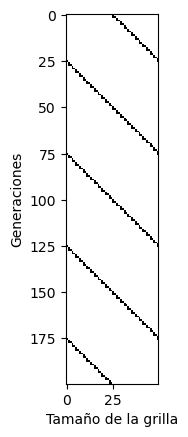

In [178]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 20
n_generaciones = 200
tamano = 50
estado_inicial = inicial_seteado(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

### Regla 50:

  Número de Regla de Wolfram: 50
  Número de Generaciones: 50
  Tamaño de la grilla: 100
  Período del Ciclo: No hay ciclo


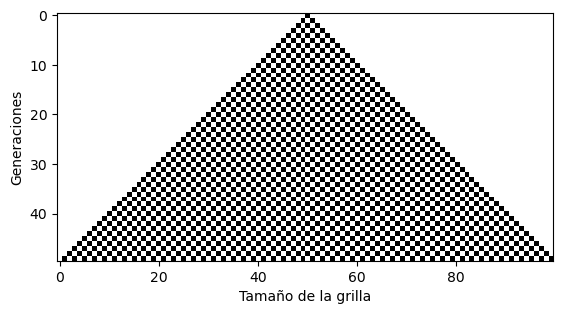

In [179]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 50
n_generaciones = 50
tamano = 100
estado_inicial = inicial_seteado(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

### Regla 110:

  Número de Regla de Wolfram: 110
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


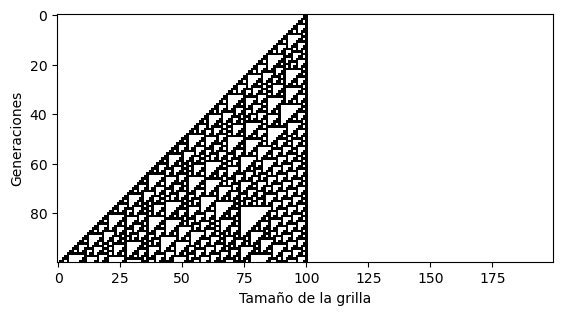

In [180]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 110
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)

### Regla 90:

  Número de Regla de Wolfram: 60
  Número de Generaciones: 100
  Tamaño de la grilla: 200
  Período del Ciclo: No hay ciclo


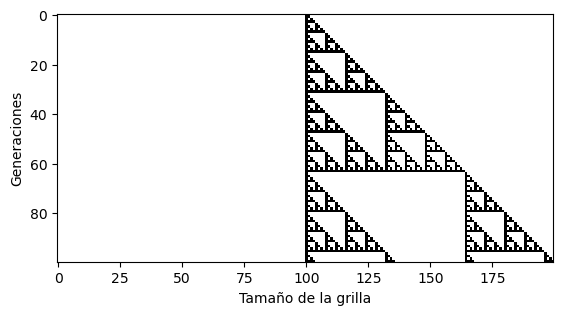

In [181]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 60
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
periodo_ciclo = patron_ciclo(automata)
visualizar_automata(automata)